In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
PATH = "drive/MyDrive/Group Project - Cellular IoT Handoff/better_csvs"
os.listdir(PATH)

['board-1669508088-mobility_driving_desert5_11_26_2022',
 'board-1669508088-mobility_driving_desert6_11_26_2022_2',
 'board-1669508088-mobility_driving_desert6_11_26_2022_1',
 'board-1669263405-mobility_driving2_11_23_2022',
 'board-1669926487-mobility_walking_ucla1_12_1_2022',
 'board-1669149465-mobility_walking_REAL_attempt5_11_22_2022',
 'board-1669928025-mobility_walking_ucla2_12_1_2022',
 'board-1669940282-mobility_walking_ucla3_12_1_2022']

In [3]:
w_rrc_df = pd.DataFrame(columns = ["msg_type", "latency"])
d_rrc_df = pd.DataFrame(columns = ["msg_type", "latency"])
w_nas_df = pd.DataFrame(columns = ["msg_type", "latency"])
d_nas_df = pd.DataFrame(columns = ["msg_type", "latency"])

In [4]:
for dir in os.listdir(PATH):
  if "walking" in dir:
    for file in os.listdir(PATH + "/" + dir):
      name = file[(file.index("2022_")+5):-4]
      f = open(PATH + "/" + dir + "/" + file, "r")
      if "nas" in file:
        myline = f.readline()
        while myline:
          try:
            
            to_add = float(myline[:-1])
            w_nas_df.loc[len(w_nas_df.index)] = [name,to_add] 
            myline = f.readline()
          except:
            continue
      elif "rrc" in file:
        myline = f.readline()
        while myline:
          try:
            
            to_add = float(myline[:-1])
            w_rrc_df.loc[len(w_rrc_df.index)] = [name,to_add] 
            myline = f.readline()
          except:
            continue

In [5]:
for dir in os.listdir(PATH):
  if "driving" in dir:
    for file in os.listdir(PATH + "/" + dir):
      name = file[(file.index("2022_")+5):-4]
      f = open(PATH + "/" + dir + "/" + file, "r")
      if "nas" in file:
        myline = f.readline()
        while myline:
          try:
            
            to_add = float(myline[:-1])
            d_nas_df.loc[len(d_nas_df.index)] = [name,to_add] 
            myline = f.readline()
          except:
            continue
      elif "rrc" in file:
        myline = f.readline()
        while myline:
          try:
            
            to_add = float(myline[:-1])
            d_rrc_df.loc[len(d_rrc_df.index)] = [name,to_add] 
            myline = f.readline()
          except:
            continue

In [6]:
w_df = pd.DataFrame(columns = ["msg_type", "latency"])
d_df = pd.DataFrame(columns = ["msg_type", "latency"])

In [7]:
for dir in os.listdir(PATH):
  if "walking" in dir:
    for file in os.listdir(PATH + "/" + dir):
      name = file[(file.index("2022_")+5):-4]
      f = open(PATH + "/" + dir + "/" + file, "r")
      myline = f.readline()
      while myline:
        try:
          
          to_add = float(myline[:-1])
          w_df.loc[len(w_df.index)] = [name,to_add] 
          myline = f.readline()
        except:
          continue

In [8]:
for dir in os.listdir(PATH):
  if "driving" in dir:
    for file in os.listdir(PATH + "/" + dir):
      name = file[(file.index("2022_")+5):-4]
      f = open(PATH + "/" + dir + "/" + file, "r")
      myline = f.readline()
      while myline:
        try:
          
          to_add = float(myline[:-1])
          d_df.loc[len(d_df.index)] = [name,to_add] 
          myline = f.readline()
        except:
          continue

In [9]:
common_vals = []
for x in w_df["msg_type"].unique():
  if x in d_df["msg_type"].unique():
    common_vals.append(x)
    print(x)

handover_connection_reconfiguration_to_connection_reconfiguration_complete
active_pdn_connectivity_request_to_activate_default_eps_bearer_context_request
connection_setup_to_connection_setup_complete
authentication_request_to_authentication_response
non_handover_connection_reconfiguration_to_connection_reconfiguration_complete
security_mode_complete_to_esm_information_request
connection_setup_complete_to_security_mode_command
security_mode_command_to_security_mode_complete
idle_pdn_connectivity_request_to_activate_default_eps_bearer_context_request
service_request_to_pdn_connectivity_request
activate_default_eps_bearer_context_request_to_attach_complete
esm_information_response_to_attach_accept
active_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept
esm_information_request_to_esm_information_response
attach_complete_to_pdn_connectivity_request
attach_request_to_authentication_request
authentication_response_to_security_mode_command
idle_activate

In [10]:
rrc_attach_order = ["connection_request_to_connection_setup", "connection_setup_to_connection_setup_complete", 
                    "connection_setup_complete_to_security_mode_command", "security_mode_command_to_security_mode_complete"]

rrc_setup_order = ["non_handover_security_mode_complete_to_connection_reconfiguration", "non_handover_connection_reconfiguration_to_connection_reconfiguration_complete"]                  

                    
nas_attach_order = ["attach_request_to_authentication_request", "authentication_request_to_authentication_response", 
                    "authentication_response_to_security_mode_command", "security_mode_command_to_security_mode_complete", 
                    "security_mode_complete_to_esm_information_request", "esm_information_request_to_esm_information_response", 
                    "esm_information_response_to_attach_accept", "active_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept", 
                    "activate_default_eps_bearer_context_request_to_attach_complete", "activate_default_eps_bearer_context_request"]



bs_handover_order = ["handover_measurement_report_to_connection_reconfiguration", "handover_connection_reconfiguration_to_connection_reconfiguration_complete"]

mme_handover_order = ["service_request_to_tracking_area_update_request", "tracking_area_update_request_to_tracking_area_update_accept"]

idle_state_order = ["service_request_to_pdn_connectivity_request", "active_pdn_connectivity_request_to_activate_default_eps_bearer_context_request", "active_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept"]

In [11]:
w_df[w_df["msg_type"] == "esm_information_response_to_attach_accept"]

,msg_type,latency
410,esm_information_response_to_attach_accept,962.843
411,esm_information_response_to_attach_accept,524.958
412,esm_information_response_to_attach_accept,636.047
413,esm_information_response_to_attach_accept,245.015
933,esm_information_response_to_attach_accept,109.976
934,esm_information_response_to_attach_accept,357.885
935,esm_information_response_to_attach_accept,128.188
936,esm_information_response_to_attach_accept,485.047
1314,esm_information_response_to_attach_accept,567.105
1600,esm_information_response_to_attach_accept,647.872


In [12]:
df = pd.DataFrame(columns = ["msg_type", "latency"])
for dir in os.listdir(PATH)[2:]:
  if "driving" in dir or "walking" in dir:
    for file in os.listdir(PATH + "/" + dir):
      name = file[(file.index("2022_")+5):-4]
      f = open(PATH + "/" + dir + "/" + file, "r")
      myline = f.readline()
      while myline:
        try:
          
          to_add = float(myline[:-1])
          df.loc[len(df.index)] = [name,to_add] 
          myline = f.readline()
        except:
          continue

In [13]:
df["msg_type"].value_counts()

non_handover_connection_reconfiguration_to_connection_reconfiguration_complete                      685
connection_request_to_connection_setup                                                              495
connection_setup_to_connection_setup_complete                                                       493
non_handover_security_mode_complete_to_connection_reconfiguration                                   460
connection_setup_complete_to_security_mode_command                                                  451
security_mode_command_to_security_mode_complete                                                     450
handover_measurement_report_to_connection_reconfiguration                                            71
handover_connection_reconfiguration_to_connection_reconfiguration_complete                           69
esm_information_request_to_esm_information_response                                                  14
esm_information_response_to_attach_accept                       

In [14]:
import plotly.graph_objects as go
rel = rrc_attach_order
df_subset = df[df["msg_type"].isin(rel)]
df_medians = df_subset.groupby(df_subset.msg_type)[['latency']].median()["latency"]
df_medians = np.around(df_medians,decimals=1)
fig = go.Figure(go.Waterfall(
    name = "rrc_attach", orientation = "h",
    measure = ["relative"] * len(rel),
    y = ["A", "B", "C", "D"],
    textposition = "outside",
    text = [str(df_medians[i]) for i in range(len(df_medians))],
    x = [df_medians[i] for i in range(len(df_medians))],
))

fig.update_layout(
        title = "Median Latency Waterfall for RRC Attach",
        showlegend = True
)

fig.show()

In [15]:
rel = rrc_setup_order
df_subset = df[df["msg_type"].isin(rel)]
df_medians = df_subset.groupby(df_subset.msg_type)[['latency']].median()["latency"]
df_medians = np.around(df_medians,decimals=1)
fig = go.Figure(go.Waterfall(
    name = "rrc_attach", orientation = "h",
    measure = ["relative"] * len(rel),
    y = ["A", "B"],
    textposition = "outside",
    text = [str(df_medians[i]) for i in range(len(df_medians))],
    x = [df_medians[i] for i in range(len(df_medians))],
))

fig.update_layout(
        title = "Median Latency Waterfall for RRC Setup",
        showlegend = True
)

fig.show()

In [16]:
rel = nas_attach_order
df_subset = df[df["msg_type"].isin(rel)]
df_medians = df_subset.groupby(df_subset.msg_type)[['latency']].median()["latency"]
df_medians = np.around(df_medians,decimals=1)
fig = go.Figure(go.Waterfall(
    name = "rrc_attach", orientation = "h",
    measure = ["relative"] * len(rel),
    y = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"],
    textposition = "outside",
    text = [str(df_medians[i]) for i in range(len(df_medians))],
    x = [df_medians[i] for i in range(len(df_medians))],
))

fig.update_layout(
        title = "Median Latency Waterfall for NAS Attach",
        showlegend = True
)

fig.show()

In [17]:
rel = bs_handover_order
df_subset = df[df["msg_type"].isin(rel)]
df_medians = df_subset.groupby(df_subset.msg_type)[['latency']].median()["latency"]
df_medians = np.around(df_medians,decimals=1)
fig = go.Figure(go.Waterfall(
    name = "rrc_attach", orientation = "h",
    measure = ["relative"] * len(rel),
    y = ["A", "B"],
    textposition = "outside",
    text = [str(df_medians[i]) for i in range(len(df_medians))],
    x = [df_medians[i] for i in range(len(df_medians))],
))

fig.update_layout(
        title = "Median Latency Waterfall for BS Handover",
        showlegend = True
)

fig.show()

In [18]:
rel = mme_handover_order
df_subset = df[df["msg_type"].isin(rel)]
df_medians = df_subset.groupby(df_subset.msg_type)[['latency']].median()["latency"]
df_medians = np.around(df_medians,decimals=1)
fig = go.Figure(go.Waterfall(
    name = "rrc_attach", orientation = "h",
    measure = ["relative"] * len(rel),
    y = ["A", "B"],
    textposition = "outside",
    text = [str(df_medians[i]) for i in range(len(df_medians))],
    x = [df_medians[i] for i in range(len(df_medians))],
))

fig.update_layout(
        title = "Median Latency Waterfall for MME Handover",
        showlegend = True
)

fig.show()

In [19]:
rel = idle_state_order
df_subset = df[df["msg_type"].isin(rel)]
df_medians = df_subset.groupby(df_subset.msg_type)[['latency']].median()["latency"]
df_medians = np.around(df_medians,decimals=1)
fig = go.Figure(go.Waterfall(
    name = "rrc_attach", orientation = "h",
    measure = ["relative"] * len(rel),
    y = ["A", "B", "C"],
    textposition = "outside",
    text = [str(df_medians[i]) for i in range(len(df_medians))],
    x = [df_medians[i] for i in range(len(df_medians))],
))

fig.update_layout(
        title = "Median Latency Waterfall for Idle State Reconnection",
        showlegend = True
)

fig.show()

In [20]:
df_subset = df[df["msg_type"].isin(rrc_attach_order)]
df_medians = df_subset.groupby(df_subset.msg_type)[['latency']].median()["latency"]
df_medians

msg_type
connection_request_to_connection_setup                59.3290
connection_setup_complete_to_security_mode_command    52.9390
connection_setup_to_connection_setup_complete          3.9400
security_mode_command_to_security_mode_complete        1.0385
Name: latency, dtype: float64

In [21]:
type(df_medians[0])

numpy.float64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



[Text(0, 0, 'activate_default_eps_bearer_context_request_to_attach_complete'),
 Text(0, 0, 'active_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept'),
 Text(0, 0, 'active_pdn_connectivity_request_to_activate_default_eps_bearer_context_request'),
 Text(0, 0, 'attach_complete_to_pdn_connectivity_request'),
 Text(0, 0, 'attach_request_to_authentication_request'),
 Text(0, 0, 'authentication_request_to_authentication_response'),
 Text(0, 0, 'authentication_response_to_security_mode_command'),
 Text(0, 0, 'connection_request_to_connection_setup'),
 Text(0, 0, 'connection_setup_complete_to_security_mode_command'),
 Text(0, 0, 'connection_setup_to_connection_setup_complete'),
 Text(0, 0, 'esm_information_request_to_esm_information_response'),
 Text(0, 0, 'esm_information_response_to_attach_accept'),
 Text(0, 0, 'handover_connection_reconfiguration_to_connection_reconfiguration_complete'),
 Text(0, 0, 'handover_measurement_report_to_connection_reconfigu

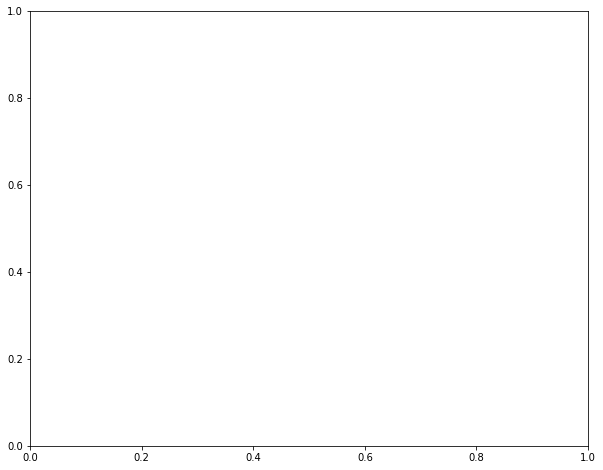

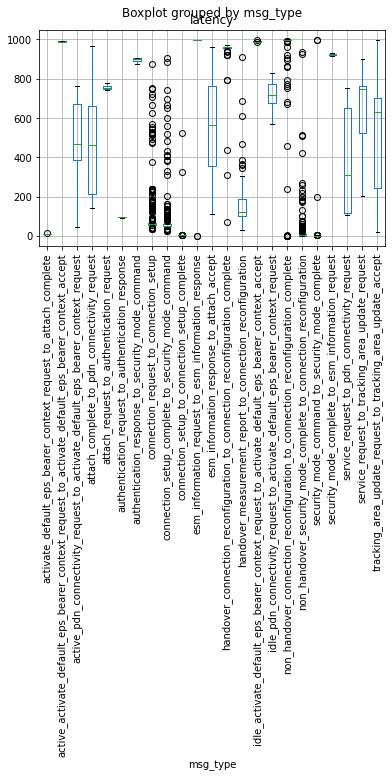

In [22]:
ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
ax = df.boxplot(column='latency',by='msg_type')
ax.set_xticklabels(sorted(df["msg_type"].value_counts().index.to_list()), rotation = 90)

In [23]:
rel = nas_attach_order
df_subset = df[df["msg_type"].isin(rel)]
df_medians = df_subset.groupby(df_subset.msg_type)[['latency']].median()["latency"]

In [24]:
df_medians

msg_type
activate_default_eps_bearer_context_request_to_attach_complete                                       10.9035
active_activate_default_eps_bearer_context_request_to_activate_default_eps_bearer_context_accept    988.9375
attach_request_to_authentication_request                                                            751.0690
authentication_request_to_authentication_response                                                    95.1720
authentication_response_to_security_mode_command                                                    898.4205
esm_information_request_to_esm_information_response                                                 998.6440
esm_information_response_to_attach_accept                                                           567.1050
security_mode_command_to_security_mode_complete                                                       1.0385
security_mode_complete_to_esm_information_request                                                   923.4240
Name: late

In [25]:
len(nas_attach_order)

10

In [26]:
for x in rel:
  print(len(df[df["msg_type"] == x]))

3
4
4
450
2
14
13
8
12
0


In [27]:
os.listdir(PATH)

['board-1669508088-mobility_driving_desert5_11_26_2022',
 'board-1669508088-mobility_driving_desert6_11_26_2022_2',
 'board-1669508088-mobility_driving_desert6_11_26_2022_1',
 'board-1669263405-mobility_driving2_11_23_2022',
 'board-1669926487-mobility_walking_ucla1_12_1_2022',
 'board-1669149465-mobility_walking_REAL_attempt5_11_22_2022',
 'board-1669928025-mobility_walking_ucla2_12_1_2022',
 'board-1669940282-mobility_walking_ucla3_12_1_2022']